In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv('/Users/parkjubro/Desktop/Dacon/data/train.csv')

In [4]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [5]:
train.shape

(1253, 10)

In [6]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다.')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [7]:
train = train.drop(columns=['id'], axis=1)

In [8]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [9]:
temp = train['Target'].unique()
np.sort(temp)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29])

In [10]:
train.groupby('Target').count().iloc[:,0]

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

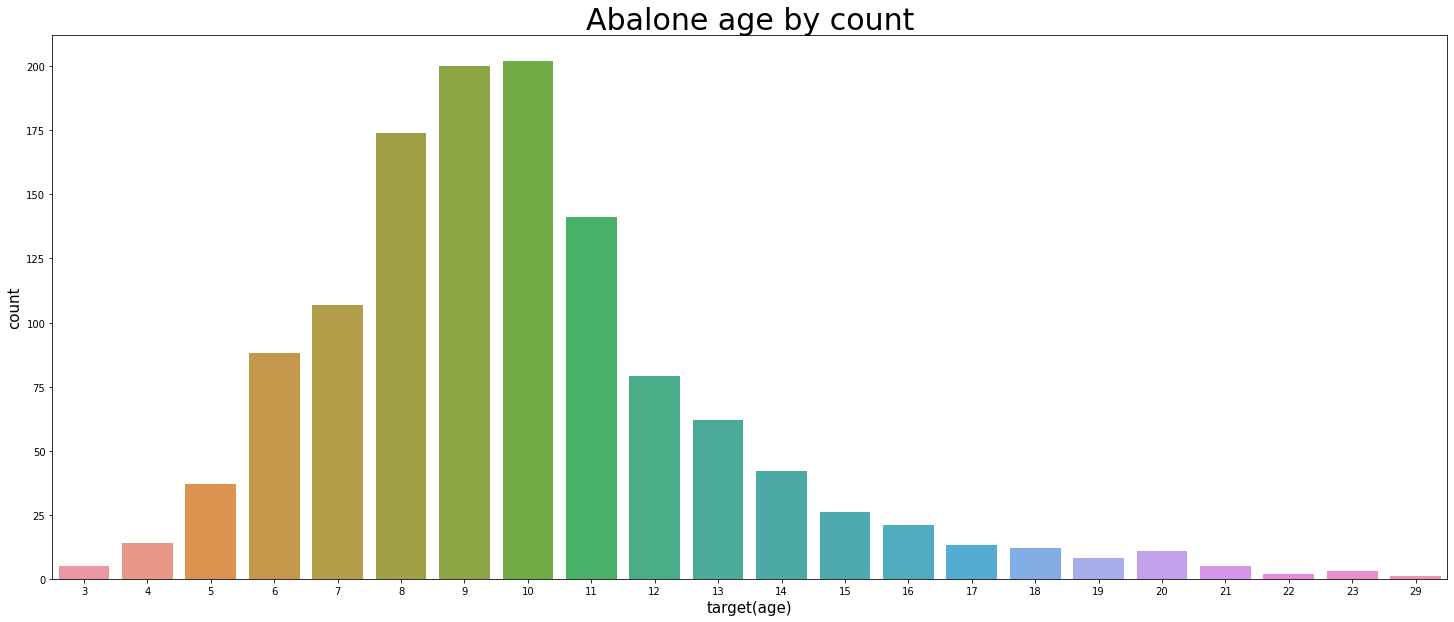

In [11]:
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target', data=train)
plt.title('Abalone age by count', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [12]:
temp1 = train['Target'] == 29
temp2 = train['Target'] == 23
train[temp1 | temp2]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
762,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1131,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1234,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23


In [13]:
train[train['Target'] == 3]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


In [14]:
train.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [16]:
print(train['Gender'].unique())

['M' 'I' 'F']


In [19]:
train.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    404
M    469
Name: Lenght, dtype: int64

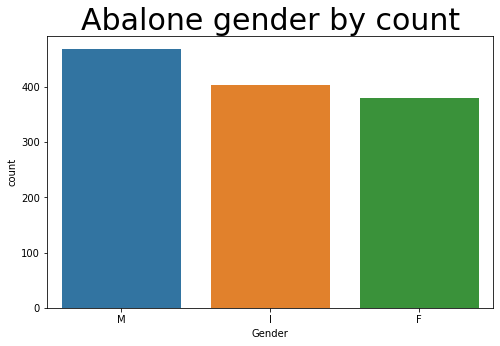

In [20]:
plt.rcParams['figure.figsize'] = [8,5]
sns.countplot('Gender', data=train)
plt.title('Abalone gender by count', fontsize=30)
plt.show()

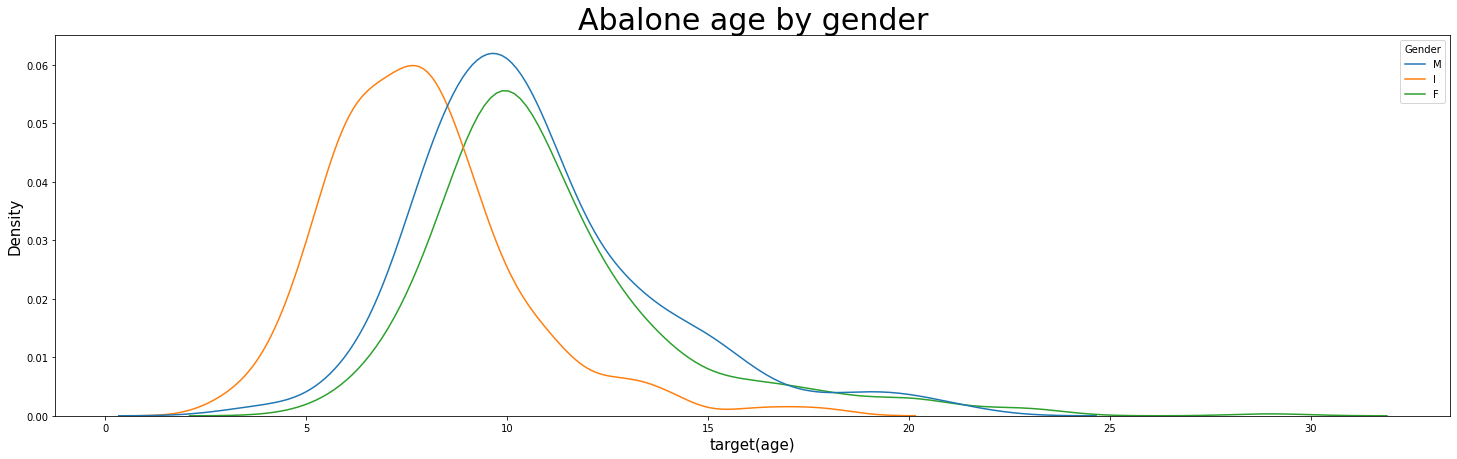

In [21]:
plt.rcParams['figure.figsize'] = [25,7]
sns.kdeplot('Target', hue='Gender', data=train)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [22]:
data_description = train.describe()
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


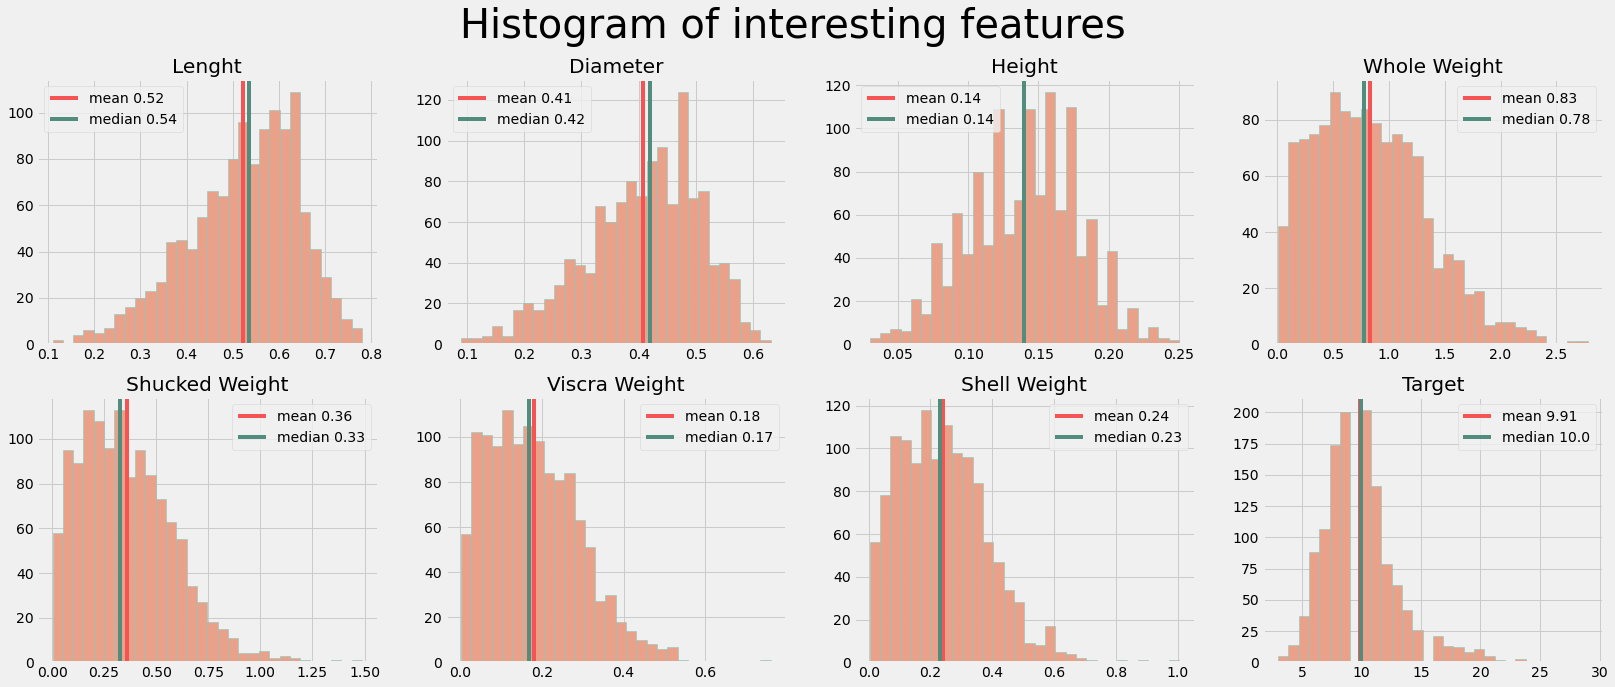

In [26]:
interest_coloumns = train.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(2, 4, figsize = (25,10))
fig.suptitle('Histogram of interesting features', fontsize=40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label= f"mean {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label= f"median {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1

In [28]:
print('전복의 평균 나이는', round(data_description[interest_coloumns[7]]['mean'],1),'입니다')

전복의 평균 나이는 9.9 입니다


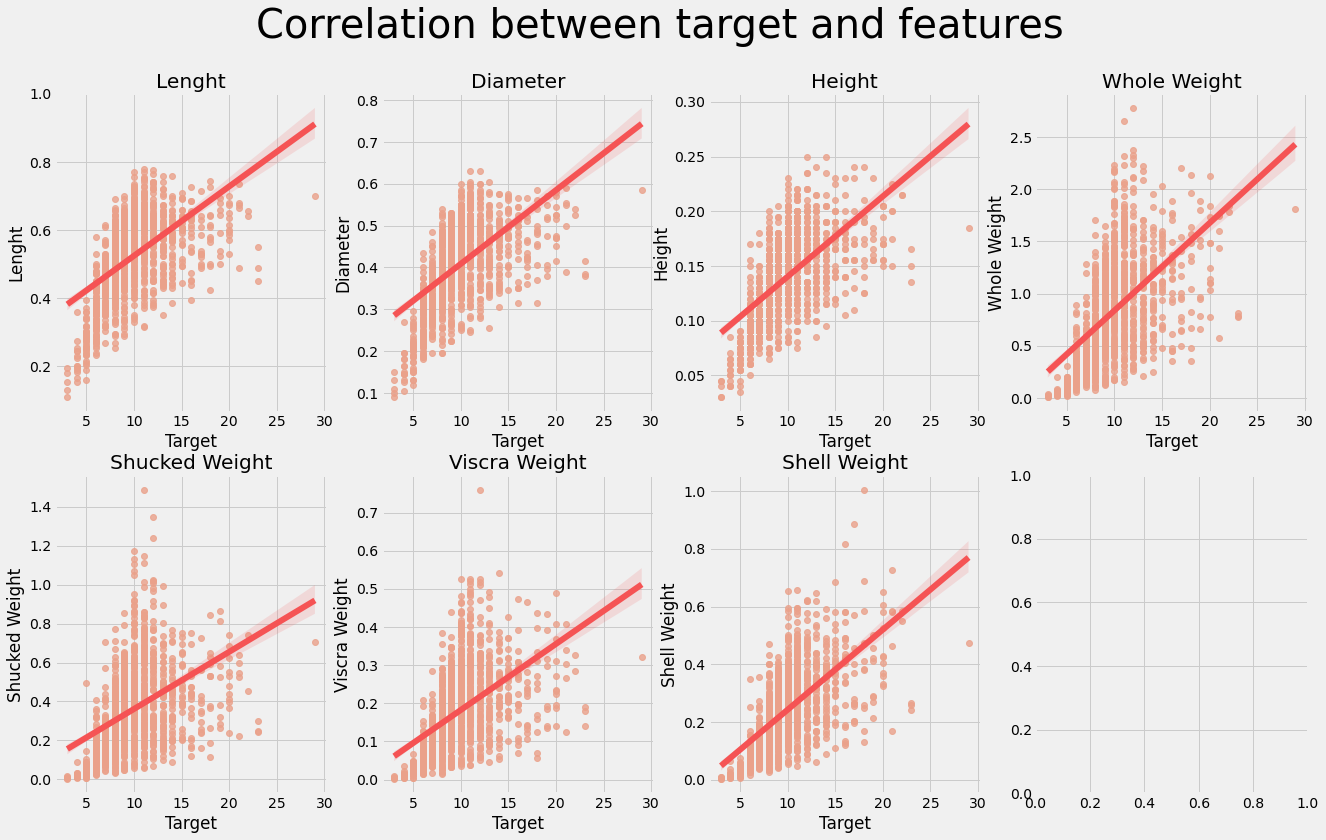

In [30]:
def visualize(axx, yfield):
    sns.regplot(x='Target', y=yfield, data=train, color='#eaa18a', line_kws= {'color': '#f55354'}, ax = axx)
    axx.set_title(yfield)
    
figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('Correlation between target and features', fontsize=40)
for i in range(len(train.columns[1:-1])):
    visualize(eval(f'ax{i+1}'), train.columns[i+1])

In [31]:
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler()
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

Text(0.5, 1.0, 'Correlation between features')

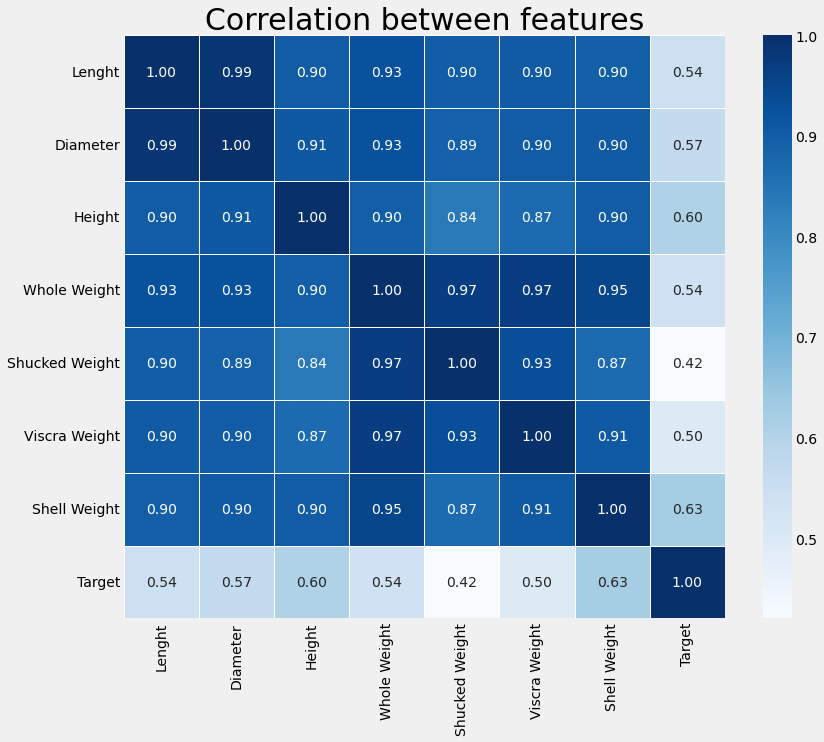

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [33]:
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

,Target
Target,1.000000
Shell Weight,0.625819
Height,0.604654
Diameter,0.567933
Lenght,0.543789
Whole Weight,0.538404
Viscra Weight,0.497283
Shucked Weight,0.420126
